# Исследование популярности компьютерных игр

В исследовании для интернет-магазина «Стримчик» нам необходимо выявить закономерности, которые определяют успешность компьютерной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. В нашем распоряжении данные из открытых источников до 2016 года: как продавались игры в разные годы, оценки пользователей и экспертов, жанры и платформы. 

## Открытие данных

Импортируем все необходимые нам для работы библиотеки и загрузим таблицу с данными об играх, сохраним ее в переменной `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.sample(20, random_state=1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


Рассмотрим подробнее каждый столбец:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию:

Получим основную информацию о типах данных и количестве пропусков:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 5 столбцов с типом `object` и 6 столбцов с числовыми данными, тип `float64`. Заметили по два пропущенных значения в столбцах с названием игры и жанром. Больше пропусков в столбцах с годом выпуска, оценками пользователей и критиков и рейтингом ESRB. Также обратили внимание, что столбец с оценками экспертов имеет числовой тип данных, а с оценками пользователей — `object`. 

**Вывод**

Получили таблицу с основными характеристиками компьютерных игр. В ней обнаружили гораздо больше данных по играм, выпущенным в 2000-е годы. Обратили внимание, что в таблице не так много игр, число проданных копий которых превышает миллион. Заметили, что в столбце `User_score` есть значение *tbd* (To Be Determined). Обычно это означает, что в данный момент рецензий от пользователей недостаточно, и как только наберется их нужное количество — сайт опубликует оценку. Это объясняет, почему в этом столбце тип данных — `object`. Также обнаружили, что в столбцах с оценками пользователей и критиков и рейтингом ESRB большое количество данных вовсе пропущено. 

## Предобработка данных

Нам необходимо подготовить данные для анализа: обработать пропущенные данные в таблице, в некоторых столбцах нужно исправить тип данных, а также для удобства работы переименовать столбцы в таблице.

### Замена названий столбцов

Сейчас названия столбцов записаны в неудобном для работы формате: в них встречаются прописные буквы. Запишем все столбцы в нижнем регистре. Также для удобства заменим `year_of_release` на `year`:

In [4]:
#применим к df атрибут columns и метод str.lower()
df.columns = df.columns.str.lower()
df = df.rename(columns={'year_of_release':'year'})

df.sample(5, random_state=2)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5444,NHL 17,PS4,2016.0,Sports,0.19,0.08,0.00,0.06,78.0,5.8,E10+
12424,My Pet Chimp,DS,2010.0,Simulation,0.06,0.00,0.00,0.00,NaN,tbd,E
4308,Star Wars Jedi Knight: Jedi Academy,XB,2003.0,Shooter,0.34,0.10,0.00,0.02,76.0,8.7,T
12916,Famicom Mini: Dig Dug,GBA,2004.0,Puzzle,0.00,0.00,0.05,0.00,NaN,NaN,NaN
5860,The King of Fighters XIII,PS3,2011.0,Fighting,0.17,0.06,0.04,0.03,77.0,8.2,T


**Вывод**

Для удобства работы с таблицей переименовали все столбцы, поменяв прописные буквы на строчные, а название «Год выпуска» `year_of_release` заменили на «Год» `year`.

### Обработка пропущенных данных

В таблице есть данные по двум играм, у которых не указано название. Выведем эти две строчки на экран:

In [5]:
df.query('name.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это две игры, выпущенные в 1993 году на платформе GEN. По этим играм также нет данных о жанре, рейтинге или оценках — значит мы можем удалить эти две строчки:

In [6]:
df = df.query('name.notna()').reset_index(drop=True)

#проверим количество пропусков в двух столбцах
df[['name', 'genre']].isna().sum()

name     0
genre    0
dtype: int64

Пропущенные данные также есть в столбце с указанием года выпуска игры. Выведем несколько таких строк:

In [7]:
df.query('year.isna()').head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


У нас нет данных по которым мы могли бы заполнить пропуски в годах. Даже если он указан в названии, это не гарантирует, что выпущена игра была также в том году. Например, «Madden NFL 2004» была выпущена в августе 2003 года, хотя в названии указан 2004. Правильнее будет тоже удалить эти строчки, тем более, что строки с пропущенными значениями составляют всего приблизительно 1,5 % (269 из 16715).

In [8]:
#в df сохраним строки, в которых заполнен год выпуска
df = df.query('year.notna()').reset_index(drop=True)

#проверим число пропусков в столбце
df['year'].isna().sum()

0

Видим большое количество пропусков в столбцах с оценками пользователей и критиков — не хватает примерно половины данных. Оценки могут отсутствовать, например, у игр, которые выходили в 1980–90-х годах. То есть задолго до появления сайтов вроде «Metacritic», которые собирают отзывы и рецензии. В то же время, в последние 10–15 лет было выпущено огромное число игр, не все из них известны и популярны, и не на каждую игру издание может опубликовать рецензию. Все-таки больше внимания привлекают долгожданные релизы от ведущих платформ. 

Было бы некорректно заполнять пропуски в оценках экспертов или пользователей, потому что это сильно исказит данные. Но мы помним, что в столбце `user_score` встречается значение *tbd* (to be determined — подлежит уточнению). Это игры, по которым пользователи поставили недостаточное количество оценок. И как только их наберется необходимое число, сайт сможет опубликовать рейтинг. 
<br>Вычислим, сколько таких строк в таблице: 

In [9]:
print('Значений с tbd:', df.loc[df['user_score'] == 'tbd', ('user_score')].count())
print('Пропущенных значений:', df['user_score'].isna().sum())

Значений с tbd: 2376
Пропущенных значений: 6605


В таблице представлено 2376 игры, по которым пользователи пока оставили недостаточно оценок. Чтобы нам было удобнее работать с данными, заменим значение *tbd* на пропуск, то есть NaN:

In [10]:
df.loc[df['user_score'] == 'tbd', ('user_score')] = np.nan

#проверим, как изменилось количество строк с tbd и с пропусками
print('Значений с tbd:', df.loc[df['user_score'] == 'tbd', ('user_score')].count())
print('Пропущенных значений:', df['user_score'].isna().sum())

Значений с tbd: 0
Пропущенных значений: 8981


В таблице не осталось значений, в которых оценка пользователя = *tbd*, но увеличилось число пропущенных значений в этом столбце, теперь их 8981. 

Изучим, на какие рейтинги организация ESRB распределяет компьютерные игры: 
   * «EC» («Early childhood») — «Для детей младшего возраста» — от 3 лет и старше
   * «E» («Everyone») — «Для всех» — от 6 лет и старше
   * «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 
   * «T» («Teen») — «Подросткам» — от 13 лет и старше
   * «M» («Mature») — «Для взрослых» — от 17 лет и старше
   * «AO» («Adults Only 18+») — «Только для взрослых» — старше 18 лет
   * «RP» («Rating Pending») — «Рейтинг ожидается» — Продукт был отправлен в ESRB и ожидает присвоения рейтинга
   
Выясним, какие рейтинги представлены в нашей таблице:

In [11]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Замители три игры с неизвестным рейтингом «K-A». Это «Kids to Adults» — старое название для рейтинга «E» — «Everyone», его не используют с 1998 года. Заменим значения «K-A» на «E»:

In [12]:
df.loc[df['rating'] == 'K-A', ('rating')] = 'E'

#проверим общее число рейтингов
df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

В столбце `rating` пропущено более 6500 значений. Стоит отметить, что организация ESRB базируется в США и Канаде и определяет рейтинги для игр, выпущенных на территории Северной Америки. Следовательно, в других регионах этот рейтинг может быть не указан. К тому же ESRB была основана в 1994 году, и для игр, выпущенных ранее, эта организация рейтинг не устанавливала. Все это объясняет большое число пропусков. 

Заменим пропущенные значения в этом столбце на «undefined» (*«не определено»*):

In [13]:
df.loc[df['rating'].isna(), ('rating')] = 'undefined'

#посчитаем количество уникальных значений в столбце
df['rating'].value_counts()

undefined    6676
E            3924
T            2905
M            1536
E10+         1393
EC              8
AO              1
RP              1
Name: rating, dtype: int64

**Вывод**

Мы удалили строки, в которых были пропущены название игры, ее жанр и год выпуска. В столбце с оценками пользователей заменили значение *tbd* (to be determined — подлежит уточнению) на пропуски, так как по факту этих оценок все равно нет. В столбце с рейтингом мы заменили устаревшее обозначение «K-A» («Kids to Adults») на современное «E» — «Everyone». Пропущенные значения заменили на *undefined*, так как рейтинг может быть пропущен у игр, выпущенных ранее 1994 года или продающихся не на террритории Северной Америки.
<br>Таким образом, пропущенные значения остались в столбцах с оценками экспертов и пользователей.

### Замена типов данных

Столбец с указанием года выпуска игры сейчас записан в числовом формате `float64`. Заменим тип данных на `datetime`:

In [14]:
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

df.sample(5, random_state=1)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13863,Stadium Games,GBA,2003,Sports,0.03,0.01,0.0,0.00,NaN,NaN,undefined
6233,Command & Conquer,N64,1999,Strategy,0.22,0.05,0.0,0.00,NaN,NaN,undefined
11571,Driven,GC,2002,Racing,0.06,0.02,0.0,0.00,55.0,NaN,T
11650,Open Season,PSP,2006,Platform,0.07,0.00,0.0,0.01,NaN,NaN,E10+
2063,Guitar Hero: Aerosmith,PS3,2008,Misc,0.73,0.15,0.0,0.11,70.0,5,T


После замены значений *tbd* на пропуски в столбце с оценками пользователей можно заменить тип данных на `float64`:

In [15]:
df['user_score'] = df['user_score'].astype('float')

#выведем общую информацию о таблице и проверим типы данных и число пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      7463 non-null float64
rating          16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Вывод**

Заменили тип данных в столбце с годом выпуска компьютерных игр на дату, теперь он принимает целочисленный формат `int64`. Также в столбце с оценками пользователей поменяли тип `object` на числовой — `float`.

### Вычисление суммарных продаж

Вычислим общие продажи компьютерных игр во всех регионах: то есть суммарное число проданных копий в Северной Америке, Европе, Японии и других странах. Запишем результат в новый столбец `total_sales`:

In [16]:
#в новом столбце запишем сумму 4 столбцов с продажами в разных регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.sample(10, random_state=1)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13863,Stadium Games,GBA,2003,Sports,0.03,0.01,0.00,0.00,NaN,NaN,undefined,0.04
6233,Command & Conquer,N64,1999,Strategy,0.22,0.05,0.00,0.00,NaN,NaN,undefined,0.27
11571,Driven,GC,2002,Racing,0.06,0.02,0.00,0.00,55.0,NaN,T,0.08
11650,Open Season,PSP,2006,Platform,0.07,0.00,0.00,0.01,NaN,NaN,E10+,0.08
2063,Guitar Hero: Aerosmith,PS3,2008,Misc,0.73,0.15,0.00,0.11,70.0,5.0,T,0.99
4894,Wario Land II (GBC),GB,1998,Platform,0.00,0.00,0.38,0.00,NaN,NaN,undefined,0.38
2869,Madden NFL 2005,GC,2004,Sports,0.54,0.14,0.00,0.02,90.0,NaN,E,0.70
12791,Sled Shred featuring the Jamaican Bobsled Team,Wii,2010,Sports,0.05,0.00,0.00,0.00,NaN,NaN,E,0.05
7007,F1 2014,X360,2014,Racing,0.08,0.13,0.00,0.02,64.0,4.1,E,0.23
14322,Minna no Golf Jou Vol.1,PSP,2007,Sports,0.00,0.00,0.03,0.00,NaN,NaN,undefined,0.03


**Вывод**

Создали новый столбец, в котором записали общие продажи игр (в миллионах копий) в Северной Америке, Японии, Европе и других странах.

## Исследовательский анализ данных

Выясним, какой период можно назвать актуальным для нашего исследования. Проанализируем общие продажи платформ и узнаем, влияют ли на них оценки критиков и пользователей. 

### Сколько игр выпускалось в разные годы?

Рассмотрим, как менялось число выпускаемых компьютерных игр в разные годы. Построим столбчатый график для столбца `year`:

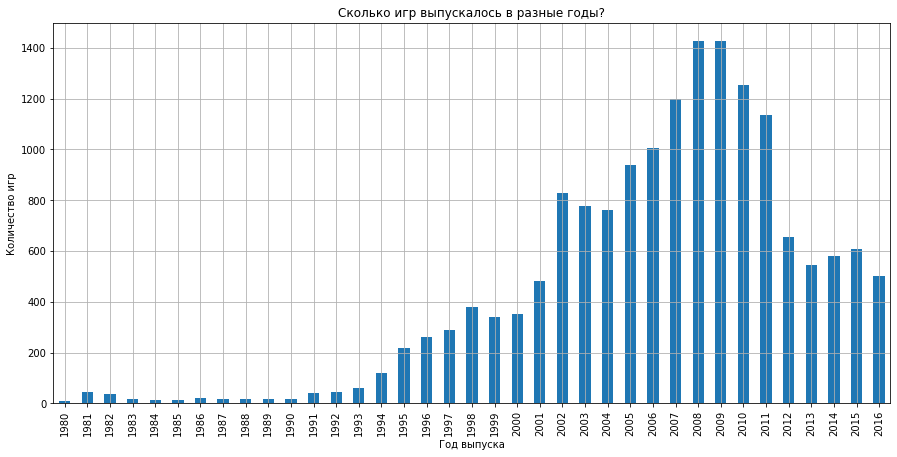

In [17]:
#вычислим общее количество игр и сгруппируем их по году выпуска, построим график по этим данным 
df.groupby('year')['name'].count().plot(kind='bar', figsize=(15, 7), title='Сколько игр выпускалось в разные годы?', grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод**

Первый заметный рост количества выпущенных компьютерных игр пришелся на 1995 год, что вероятно связано с развитием графики и зарождением новых жанров. Следующий всплеск — 2002 год, когда набирали популярность мобильные и онлайн-игры, появились новые консоли, такие как PlayStation 2 или Xbox. Максимальное количество игр было выпущено в 2008 и 2009 годах. После этого число выпущенных игр стало снижаться: в 2012 вышло более чем в 1,5 раза меньше игр, чем в 2011. И в последние 5 лет число выпущенных игр варьируется в диапазоне 500–600 в год.

### Как менялись продажи по платформам?

Выявим 10 платформ с самыми высокими общими продажами:

In [18]:
df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим первые 6 платформ с самыми высокими суммарными продажами: PS2, X360, PS3, Wii, DS и PS. Построим график и узнаем, как распределялись их продажи в разные годы:

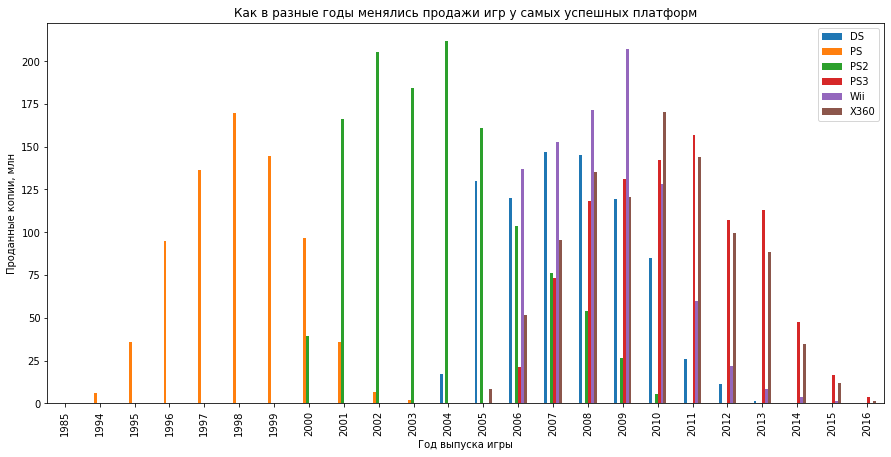

In [19]:
#сохраним названия 6 платформ
name = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

(df
    .query('platform == @name')
    .pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15, 7), title='Как в разные годы менялись продажи игр у самых успешных платформ')
)
plt.legend()
plt.xlabel('Год выпуска игры')
plt.ylabel('Проданные копии, млн')
plt.show()

По графику видно, что в среднем платформа «живет» 10 лет. Пиковое число проданных копий достигается примерно в середине этого периода. После шести лет существования платформы продажи начинают падать. Все выбранные нами 6 платформ к 2016 году уже потеряли свои позиции.

Для анализа нам необходимо определить *потенциально успешные* игры. Ранее мы выяснили, что максимальных показателей продаж платформы достигают приблизительно к пятому году своего существования. Можно сделать вывод, что игры, которые будут популярны в 2017 году, выпущены не ранее 2013 года. Есть вероятность, что у нас представлены неполные данные за 2016 год, поэтому будет лучше исключить его. То есть актуальный период для нашего исследования — с 2013 по 2015 год.

In [20]:
df_new = df.query('year >= 2013 and year <= 2015').reset_index(drop=True)

df_new.sample(5, random_state=1)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
723,Teenage Mutant Ninja Turtles: Danger of the Ooze,X360,2014,Adventure,0.11,0.07,0.00,0.02,NaN,6.4,E10+,0.20
1012,Minecraft: Story Mode,PC,2015,Adventure,0.02,0.06,0.00,0.01,NaN,NaN,undefined,0.09
1683,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no...,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
1717,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
1695,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01


**Вывод**

Рассмотрели пять платформ с самыми высокими продажами и выявили, что в среднем период жизни платформы составляет 10 лет. Первую половину этого срока платформы наращивают объемы продаж и выходят к максимальным значениям, а во второй половине наблюдается спад числа общих продаж. Для нашего исследования определили актуальный период с 2013 по 2015 год.  

### Какие платформы будут потенциально успешными в 2017 году?

Определим, какие платформы продали больше всего копий в период с 2013 по 2015 годы. 

In [21]:
#рассчитаем общие продажи и выведем 5 лидирующих платформ 
df_new.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS4,244.89
PS3,177.83
X360,135.28
XOne,133.17
3DS,128.11


В период с 2013 по 2015 годы самые высокие продажи были у платформ PS4, PS3, X360, XOne и 3DS. Построим для них график распределения общих продаж по годам:

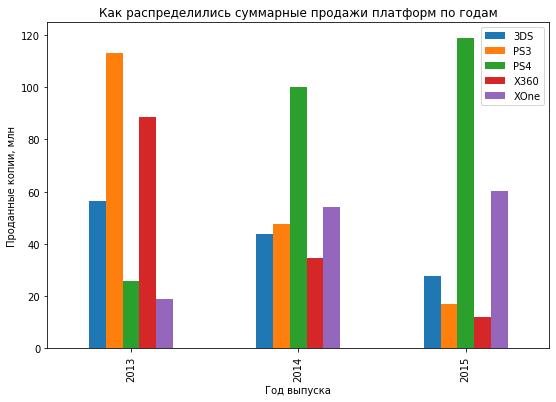

In [22]:
names = ['PS4', 'PS3', 'X360', 'XOne', '3DS']

(df_new
    .query('platform == @names')
    .pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(9, 6), title='Как распределились суммарные продажи платформ по годам')
)
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Проданные копии, млн')    
plt.show()

К 2015 году набирают рост платформы PS4 и XOne. X360 и PS3 имеют высокий уровень продаж, но в 2013 году они уже прошли свои пики и в 2015 проигрывают конкурентам. У 3DS тоже снижаются продажи, но менее стремительно. Она тоже в 2017 году может остаться прибыльной. 

**Вывод**

Выявили пять плафторм, продавшими наибольшее число копий в период с 2013 по 2015 год. По этим данным построили график и определили потенциально успешные платформы — PS4, XOne и 3DS.

### Глобальные продажи игр в разбивке по платформам

Изучим глобальные продажи потенциально успешных платформ: PS4, XOne и 3DS. Построим диаграмму размаха с разбивкой по платформам:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


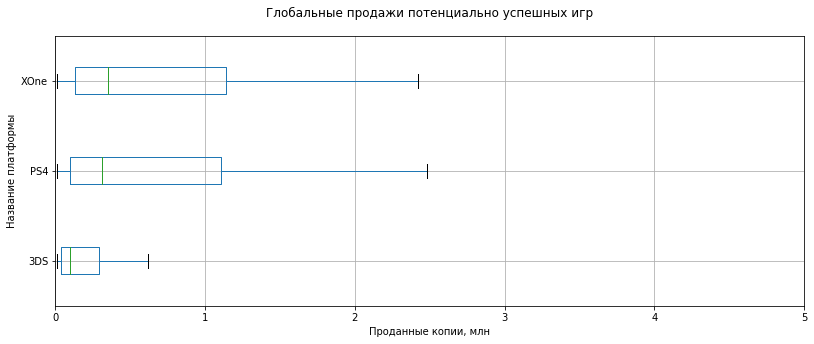

In [23]:
df_new.query('platform == ["PS4", "3DS", "XOne"]').boxplot(by='platform', 
                                                           column='total_sales', figsize=(13, 5), vert=False, showfliers=False)
plt.title(None)
plt.suptitle('Глобальные продажи потенциально успешных игр')
#установим верхнюю границу в 5 млн копий
plt.xlim(0, 5)
plt.ylabel('Название платформы')
plt.xlabel('Проданные копии, млн')
plt.show()

**Вывод**

Медианы и границы выбросов для платформ PS4 и XOne примерно одинаковые: медиана составляет приблизительно 0,3 млн копий, а значение верхних усов не превышает 2,5 млн копий. Медиана продаж платформы 3DS значительно меньше и равна 100 тыс. копий, граница выбросов приходится на 0,6 млн копий. 
То есть в среднем в период с 2013 по 2015 год игры платформы 3DS продавались хуже, чем игры платформ Xbox One и PS4.

### Как влияют на продажи внутри одной платформы отзывы пользователей и критиков?

Существует ли зависимость между оценками пользователей и критиков и числом проданных копий игры? Построим диаграммы рассеяния для каждой из трех платформ. Также вычислим коэффициент корреляции Пирсона для этих же значений: 

In [24]:
#напишем функцию, которая для каждой платформы будет выводить два графика, а также считать коэффициенты корреляции 
def scatter_corr(data, platform):
    new_corr = data.query('platform == @platform')[['user_score','critic_score','total_sales']]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    
    new_corr.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.8, grid=True, ax=axes[0])
    axes[0].set_xlabel('Оценки пользователей')
    axes[0].set_ylabel('Проданные копии, млн')
    new_corr.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.8, grid=True, ax=axes[1])
    axes[1].set_xlabel('Оценки критиков')
    axes[1].set_ylabel('Проданные копии, млн')
    fig.suptitle('Влияние оценок критиков и пользователей на продажи платформы {}'.format(platform))
    plt.show()
    
    user_sales = new_corr.corr().loc['user_score', 'total_sales']
    critic_sales = new_corr.corr().loc['critic_score', 'total_sales']
    
    print('Корреляция продаж и оценок пользователей для платформы {}: {}'.format(platform, round(user_sales, 3)))
    print('Корреляция продаж и оценок критиков для платформы {}: {}'.format(platform, round(critic_sales, 3)))

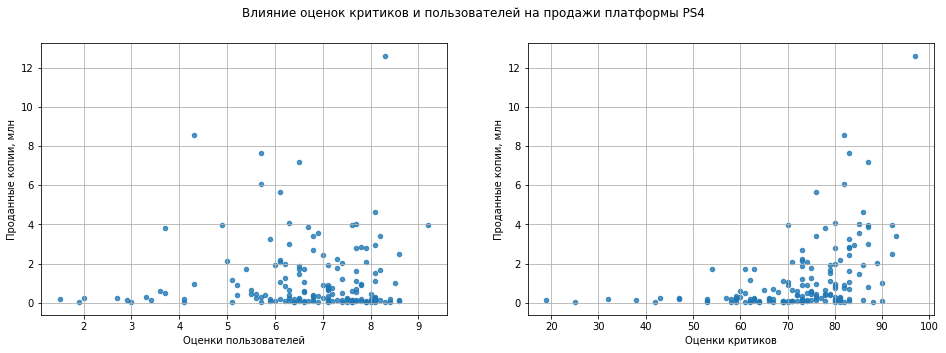

Корреляция продаж и оценок пользователей для платформы PS4: 0.024
Корреляция продаж и оценок критиков для платформы PS4: 0.432


In [25]:
scatter_corr(df_new, 'PS4')

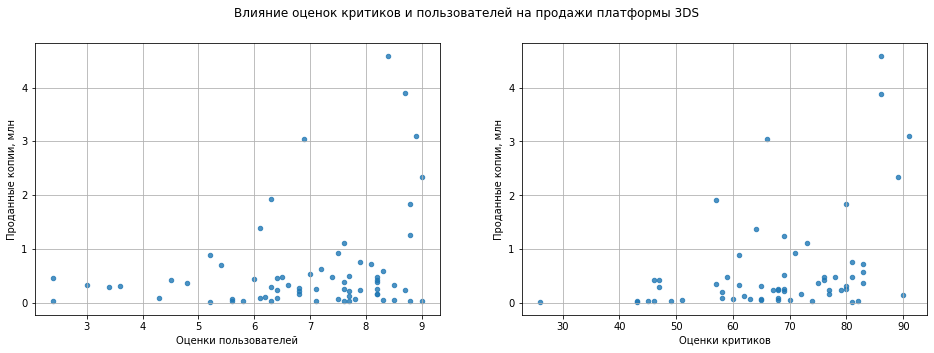

Корреляция продаж и оценок пользователей для платформы 3DS: 0.265
Корреляция продаж и оценок критиков для платформы 3DS: 0.384


In [26]:
scatter_corr(df_new, '3DS')

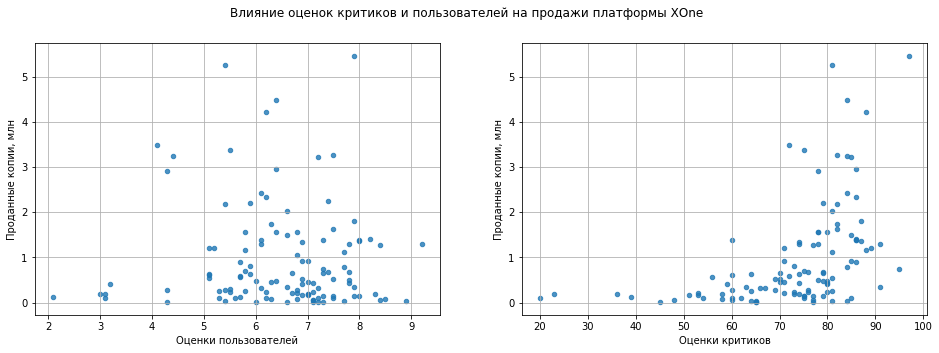

Корреляция продаж и оценок пользователей для платформы XOne: -0.039
Корреляция продаж и оценок критиков для платформы XOne: 0.459


In [27]:
scatter_corr(df_new, 'XOne')

Рассмотрим влияние оценок на продажи на примере платформы PS4. Оценки пользователей не имеют влияния на продажи игр: большинство высоких оценок (7–8,5 из 10) было поставлено играм, число проданных копий которых не превышает и 1,5 млн. При этом есть игры, на продажи которых не повлияли средние или низкие оценки от пользователей. Коэффициент корреляции также показывает отсутствие зависимости между значениями, он близок к нулю и равен 0,02. 
<br>С отзывами критиков ситуация другая.  Высокие оценки часто оказывали положительное влияние на продажи, но не всегда гарантировали ее успех. Многие игры получали высокие оценки и при этом имели небольшие продажи. При этом игры с низкими оценками продаются хуже (менее 1 млн копий). Коэффициент корреляции составляет 0,43, что говорит он наличии средней взаимосвязи между продажами и оценками критиков. 

Сравним зависимость продаж и оценок для других платформ. 
<br>Оценки пользователей слабо влияют на продажи платформ 3DS и XOne. Высокие оценки не всегда гарантируют большие продажи. Хотя у платформы 3DS было несколько игр с максимальными оценками, число проданных копий которых составило от 2 до 5 млн. Но в целом говорить о прямой взаимосвязи этих показателей мы не можем. Значения коэффициентов корреляции это подтверждают: 0,26 — для 3DS, –0,04 — для XOne. 
<br>Оценки критиков все же имеют большее влияние на продажи платформ 3DS и XOne. Особенно явно это видно на графике для платформы XOne: чем выше оценка, тем больше число проданных копий. Тем не менее, зависимость числа продаж от оценки критиков недостаточно сильная: коэффициент корреляции для 3DS равен 0,38, для XOne — 0,46.

**Вывод**

Проанализировали взаимосвязь между общими продажами игр и оценками пользователей и критиков. На продажи трех потенциально успешных платформ оценки пользователей влияния не оказывают. В то же время существует небольшая зависимость между продажами и оценками критиков.  

### Общее распределение игр по жанрам

Рассмотрим, в каких жанрах выпускаются игры. Построим график для отображения доли каждого жанра:

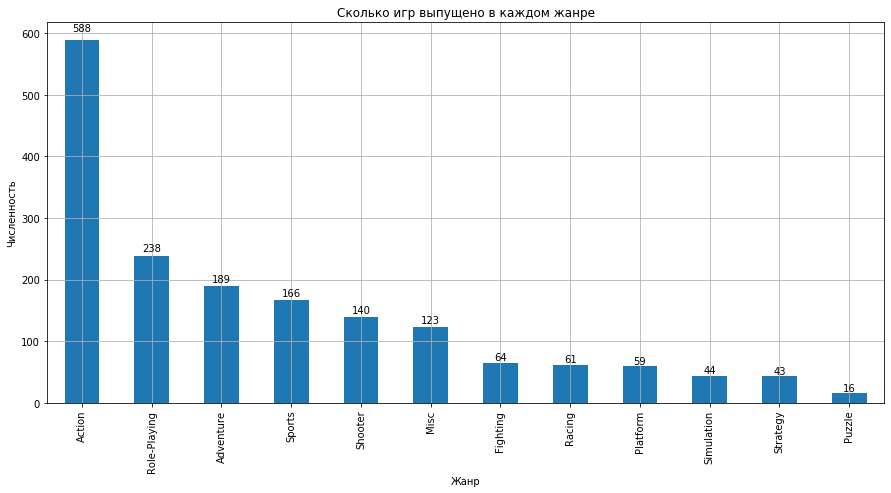

In [28]:
plot = (df_new
    .groupby('genre').agg({'name':'count'})
    .sort_values(by='name', ascending=False)
    .plot(kind='bar', figsize=(15, 7), legend=False, title='Сколько игр выпущено в каждом жанре', grid=True)
)
for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.02*height, round(height, 1), ha='center', va='bottom')
        
plt.xlabel('Жанр')
plt.ylabel('Численность')
plt.show()

Треть всех игр была выпущена в жанре Action (Экшн). Также платформы создали большое количество игр в жанрах Role-Playing  (Ролевая игра), Adventure (Приключенческая игра, или Квест) и Sports (Спортивный симулятор). Меньше всего выпущено игр в жанрах Simulation (Симулятор), Strategy (Стратегическая игра) и Puzzle (Головоломка). 

Выясним, какие жанры приносят больше прибыли:

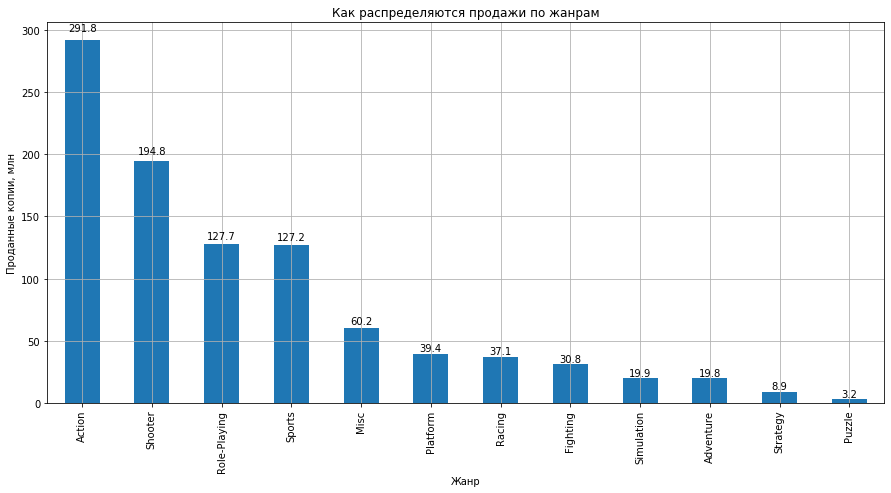

In [29]:
plot = (df_new
     .groupby('genre').agg({'total_sales':'sum'})
     .sort_values(by='total_sales', ascending=False)
     .plot(kind='bar', figsize=(15, 7), legend=False, title='Как распределяются продажи по жанрам', grid=True)
)
for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.02*height, round(height, 1), ha='center', va='bottom')
        
plt.xlabel('Жанр')
plt.ylabel('Проданные копии, млн')
plt.show()

Самый прибыльный жанр — Action, продано почти 300 млн копий. На втором месте Shooter (Шутер), во многом похожий на Action, — с около 200 млн проданных копий. Следом идут Sports и Role-Playing, их продажи на уровне прибл. 130 млн копий. Самые неприбыльные жанры — Strategy и Puzzle.

Также посчитаем, какие жанры *в среднем* приносят больше прибыли: 

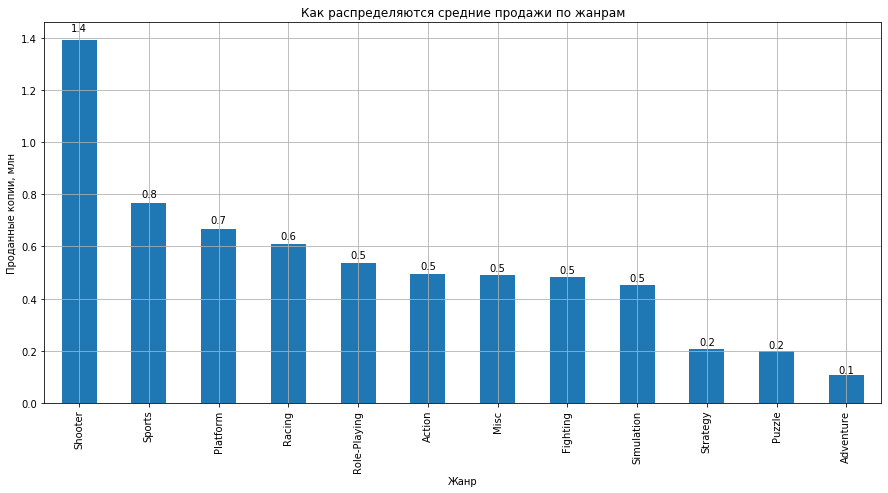

In [30]:
plot = (df_new
     .groupby('genre').agg({'total_sales':'mean'})
     .sort_values(by='total_sales', ascending=False)
     .plot(kind='bar', figsize=(15, 7), legend=False, title='Как распределяются средние продажи по жанрам', grid=True)
)
for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.02*height, round(height, 1), ha='center', va='bottom')
        
plt.xlabel('Жанр')
plt.ylabel('Проданные копии, млн')
plt.show()

В среднем больше прибыли приносит жанр Shooter, а игр в жанре Action продано примерно в 2,5 меньше. Средние значения жанров Strategy, Puzzle и Adventure показали низкий уровень продаж. 

**Вывод**

В жанре Action выпускается самое большое число игр (его доля — 34 %), поэтому прибыль этого жанра гораздо выше, чем у остальных. Также следует отметить жанр Shooter, доля которого составляет всего 8 %, но при этом прибыль на высоком уровне — почти 200 млн копий. Самые неприбыльные жанры: Strategy и Puzzle. Но игр в этих жанрах выпускается совсем немного (1–2 %), поэтому и прибыль маленькая. 

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона: Северной Америки, Европы и Японии.


### Топ-5 популярных платформ

Выясним, какие платформы лучше продаются в каждом регионе, и составим топ-5 популярных платформ. 

In [31]:
top_names = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}

#создадим цикл, который будет для каждой платформы считать суммарные продажами по регионам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    top_sales = df_new.groupby('platform').agg({column:'sum'}).sort_values(by=column, ascending=False)
    #создадим новый столбец с размером доли платформы от общих продаж в данном регионе
    top_sales['%'] = round(top_sales[column] / top_sales[column].sum(), 2)
    print('Топ-5 популярных платформ, регион', top_names[column])
    display(top_sales.head())

Топ-5 популярных платформ, регион Северная Америка


,na_sales,%
platform,,
PS4,87.25,0.22
X360,80.97,0.21
XOne,78.85,0.20
PS3,62.83,0.16
3DS,34.06,0.09


Топ-5 популярных платформ, регион Европа


,eu_sales,%
platform,,
PS4,109.31,0.32
PS3,66.55,0.20
XOne,41.96,0.12
X360,41.81,0.12
3DS,28.63,0.08


Топ-5 популярных платформ, регион Япония


,jp_sales,%
platform,,
3DS,59.78,0.49
PS3,22.05,0.18
PSV,15.03,0.12
PS4,10.22,0.08
WiiU,10.21,0.08


В Северной Америке примерно с равными долями продаж наиболее популярны три платформы: PS4, X360 и XOne, их доля равна около 20 %. Чуть хуже продаются PS3, их доля составляет 16 % от общих продаж в этом регионе. На последнем месте платформа 3DS с долей продаж в 8 % . 
<br> В Европе самая популярная платформа — PS4, ее доля равна 32 % от общих продаж. Менее популярны PS3 (19 %), XOne и X360 (обе — 12 %). Как и в Северной Америке, платформа 3DS завершает топ-5, и ее доля тоже составляет 8 %.
<br>В Японии же платформа 3DS находится на первом месте, ее доля продаж равна половине от общего объема. Это неудивительно: 3DS разработала японская компания Nintendo, она популярна именно на внутреннем рынке. Также в список популярных платформ вошли PS3, ее доля составляет <br> 18 %, PSV с долей в 12 %, а также PS4 и WiiU (обе — 8 % от общих продаж). Платформы XOne и Х360, пользующиеся популярностью в Европе и Северной Америке, в японский топ-5 не вошли. 

**Вывод**

В Северной Америке и Европе наибольшей популярностью пользуются одни и те же платформы: PS4, PS3, XOne, X360 и 3DS. Хотя доли от продаж распределились с различиями, лидируещей платформой является PS4. На последнем месте в обоих регионах находится 3DS. При этом в Японии эта платформа возглавляет топ-5, ее доля от общих продаж почти равна 50 %. Также в Японии популярны PSV и WiiU, но при этом не пользуются успехом платформы от Microsoft (XOne и Х360), хорошо продающиеся в Америке и Европе.   

### Топ-5 популярных жанров

Для каждого из регионов найдем по пять популярных жанров:

In [32]:
#создадим цикл, который будет для каждого жанра считать суммарные продажами по регионам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genres = df_new.groupby('genre').agg({column:'sum'}).sort_values(by=column, ascending=False)
    #создадим новый столбец с размером доли от общих продаж в данном регионе
    top_genres['%'] = round(top_genres[column] / top_genres[column].sum(), 2)
    print('Топ-5 популярных жанров, регион', top_names[column])
    display(top_genres.head())

Топ-5 популярных жанров, регион Северная Америка


,na_sales,%
genre,,
Action,116.76,0.30
Shooter,93.50,0.24
Sports,57.73,0.15
Role-Playing,40.51,0.10
Misc,26.73,0.07


Топ-5 популярных жанров, регион Европа


,eu_sales,%
genre,,
Action,107.45,0.32
Shooter,71.96,0.21
Sports,48.51,0.14
Role-Playing,32.69,0.10
Misc,19.38,0.06


Топ-5 популярных жанров, регион Япония


,jp_sales,%
genre,,
Role-Playing,44.43,0.37
Action,33.42,0.28
Misc,8.16,0.07
Fighting,6.90,0.06
Shooter,5.55,0.05


В Северной Америке и Европе пятерка самых популярных жанров полностью совпадает, их доля от общих продаж также приблизительно одинакова. В топ-5 вошли жанры Action, Shooter, Sports, Role-Playing и Misc (Другие — игры, не вошедшие в какой-либо другой класс). В Японии же на первом месте жанр Role-Playing, следом — Action. Со значительно меньшей долей от продаж на последних местах жанры Misc, Fighting (Файтинг) и Shooter. 

**Вывод**

Топ-5 популярных жанров в Америке и Европе полностью совпадают, на первых строчках Action и Shooter. В Японии же Action расположился на втором месте, а самый популярный жанр — Role-Playing. Возможно это связано с влиянием японской школы ролевых компьютерных игр на внутренний рынок: большинство таких игр разрабатывается именно для пользователей из Японии.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выясним, какое влияние на продажи оказывает рейтинг ESRB

In [33]:
#создадим цикл, который будет для каждого рейтинга считать суммарные продажами по регионам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    esrb = df_new.groupby('rating').agg({column:'sum'}).sort_values(by=column, ascending=False)
    #создадим новый столбец с размером доли от общих продаж по данному рейтингу
    esrb['%'] = round(esrb[column] / esrb[column].sum(), 2)
    print('Зависимость продаж от рейтинга ESRB, регион', top_names[column])
    display(esrb)

Зависимость продаж от рейтинга ESRB, регион Северная Америка


,na_sales,%
rating,,
M,149.54,0.38
undefined,80.89,0.21
E,71.08,0.18
E10+,50.43,0.13
T,40.84,0.10


Зависимость продаж от рейтинга ESRB, регион Европа


,eu_sales,%
rating,,
M,128.78,0.38
undefined,71.44,0.21
E,69.75,0.20
E10+,38.88,0.11
T,32.16,0.09


Зависимость продаж от рейтинга ESRB, регион Япония


,jp_sales,%
rating,,
undefined,70.73,0.58
T,18.32,0.15
E,14.07,0.12
M,12.91,0.11
E10+,5.44,0.04


В Северной Америке и Европе популярность игр с определенными рейтингами распределена одинаково. Игры с рейтингом «М» (от 17 лет и старше) имеют 38-процентные доли от общих продаж. Игры без рейтинга имеют долю в 20 %. Вероятно, эти игры были выпущены не на территории Северной Америки, например, в Японии. Детские игры с рейтингами «E» (от 6 лет и старше) и «E10+» (от 10 лет и старше) имеют доли в 18–20 % и 11–12 %, соотвественно. Доля от продаж игр для подростков (от 13 лет и старше) составляет около 1 % от общих продаж. 
<br>В Японии большей популярностью пользуются игры без рейтинга от ESRB (58 % от общих продаж). Дело в том, что в Японии действует своя организация по определению рейтингов видеоигр — CERO. Именно CERO присуждает рейтинги играм, продающимся на территории страны, а рейтинг от ESRB в Японии ни на что не влияет. Тем не менее, популярностью пользуются игры для подростков, их доля от продаж равна 15 %. На игры с рейтингами «E» и «M» приходится примерно по 10 % от общих продаж. Менее популярны игры для всех от 10 лет и старше, их доля составляет менее 1 %.

**Вывод**

В Северной Америке и Европе наиболее популярны игры с рейтингом «M» — от 17 лет и старше. На игры для подростков (рейтинг «Т») приходятся самые маленькие доли от общих продаж. В Японии самыми популярными оказались игры без рейтинга от ESRB, так как в Японии есть своя организация (CERO), определяющая рейтинги. Тем не менее, игры для подростков с рейтингом «Т» от ESRB продаются в Японии лучше других, их доля составляет 15 %.

## Проверка гипотез

Выясним, различаются ли средние значения пользовательских рейтингов платформ Xbox One и РС, а также игровых жанров Action и Sports. 

### Сравнение пользовательских рейтингов платформ Xbox One и PC

Сформулируем гипотезы и выясним, различаются ли средние оценки пользователей платформ Xbox One и PC:
<br>**Нулевая гипотеза:** Средние значения пользовательских рейтингов платформ Xbox One и PC равны.
<br>**Альтернативная гипотеза:** Средние значения пользовательских рейтингов платформ Xbox One и PC различаются.

In [34]:
#создадим две переменные с указанием пользовательских рейтингов для обеих платформ
#применим метод dropna(), чтобы удалить все NaN-значения
xone_score = df_new.query('platform == "XOne"')['user_score'].dropna()
pc_score = df_new.query('platform == "PC"')['user_score'].dropna()

Для каждой платформы посчитаем дисперсию и стандартное отклонение пользовательского рейтинга:

In [35]:
#вычислим дисперсию методом np.var
#укажем параметр ddof=1, так как мы работаем с выборкой, а не генеральной совокупностью
print('Дисперсия пользовательского рейтинга, платформа XOne:', np.var(xone_score, ddof=1).round(2))
#стандартное отклонение вычислим методом np.std, также укажем ddof=1
print('Стандартное отклонение пользовательского рейтинга, платформа XOne:', np.std(xone_score, ddof=1).round(2))
print('Дисперсия пользовательского рейтинга, платформа PC:', np.var(pc_score, ddof=1).round(2))
print('Стандартное отклонение пользовательского рейтинга, платформа PC:', np.std(pc_score, ddof=1).round(2))

Дисперсия пользовательского рейтинга, платформа XOne: 1.66
Стандартное отклонение пользовательского рейтинга, платформа XOne: 1.29
Дисперсия пользовательского рейтинга, платформа PC: 3.07
Стандартное отклонение пользовательского рейтинга, платформа PC: 1.75


Дисперсия оценок пользователей платформы РС и, следовательно, стандартное отклонение больше, чем платформы XOne. То есть значения пользовательского рейтинга платформы РС разбросаны относительно среднего сильнее, чем XOne. 

Построим гистограмму с распределением оценок пользователей по обеим платформам. 

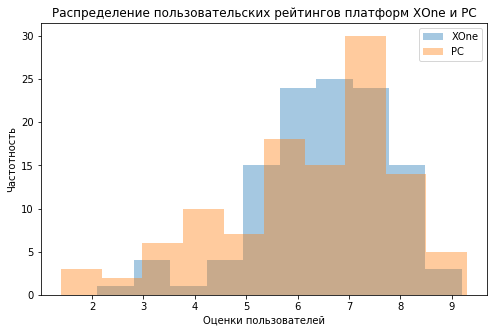

In [36]:
#построим один общий график для обеих платформ, установим alpha=0.4 для лучшего восприятия
xone_score.plot(kind='hist', label='XOne', alpha=0.4)
pc_score.plot(kind='hist', label='PC', alpha=0.4, figsize=(8, 5))
plt.title('Распределение пользовательских рейтингов платформ XOne и РС')
plt.legend()
plt.ylabel('Частотность')
plt.xlabel('Оценки пользователей')
plt.show()

Обе гистограммы ассиметричные, со скошенным в положительную сторону набором данных. Пиковое значение оценок платформы XOne равно 6,5. Платформу РС оценивают чуть выше, пик приходится на 7–7,5. 

Выясним, различаются ли дисперсии двух выборок: по платформе XOne и PC. Проведем тест Левена на равенство дисперсий:

In [37]:
#зададим уровень статистической значимости в 5 %
alpha = 0.05
#проведем тест Левена и вычислим значение р
stat, p = levene(xone_score, pc_score)
print('p-value:', p)

#если значение р меньше 5 %, то дисперсии не равны
if p < alpha:
    print('Дисперсии не равны')
else:
    print('Дисперсии равны')

p-value: 0.0020191604962372426
Дисперсии не равны


Тест Левена показал, что значение *p* равно 0,2 %. Можем сделать вывод, что дисперсии двух выборок не равны. 

Для проверки гипотез проведем t-тест о равенстве средних двух генеральных совокупностей для пользовательского рейтинга, а также вычислим значение *р*. Критический уровень статистической значимости *alpha* будет равен 5 %. В параметре *equal_var* укажем значение *False*, так как дисперсии выборок не равны по результатам теста Левена. 

In [38]:
alpha = 0.05
#в переменной сохраним результаты t-теста, первый массив с данными по платформе XOne, второй - PC
platform_result = st.ttest_ind(xone_score, pc_score, equal_var=False)
#выведем значение p
print('p-value:', platform_result.pvalue)

#если значение р меньше 5 %, то отвергаем нулевую гипотезу
if platform_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние значения не равны')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.2867036680187632
Не отвергаем нулевую гипотезу


**Вывод**

Значение *p* равно 29 %, то есть мы не можем отвергнуть нулевую гипотезу. Скорее всего, в генеральной совокупности средние пользовательские рейтинги платформ XOne и РС близки по значению. 

### Сравнение пользовательских рейтингов жанров Action и Sports 

Сравним средние оценки пользователей по двум жанрам: Action и Sports. Сформулируем гипотезы:
<br>**Нулевая гипотеза:** Средние значения пользовательских рейтингов жанров Action и Sports равны. 
<br>**Альтернативная гипотеза:** Средние значения пользовательских рейтингов Action и Sports различаются.

Создадим две переменные для рейтингов пользователей жанров Action и Sports:

In [39]:
#сохраним в двух переменных оценки пользователей по жанрам, удалим пропуски методом dropna()
action_score = df_new.query('genre == "Action"')['user_score'].dropna()
sports_score = df_new.query('genre == "Sports"')['user_score'].dropna()

Вычислим дисперсию и стандартное отклонение пользовательских рейтингов жанров Action и Sports:

In [40]:
#методом np.var вычислим дисперсию, добавим параметр ddof=1, так как мы работаем с выборками
print('Дисперсия пользовательского рейтинга, жанр Action:', np.var(action_score, ddof=1).round(2))
#стандартное отклонение вычислим методом np.std, также укажем ddof=1
print('Стандартное отклонение пользовательского рейтинга, жанр Action:', np.std(action_score, ddof=1).round(2))
print('Дисперсия пользовательского рейтинга, жанр Sports:', np.var(sports_score, ddof=1).round(2))
print('Стандартное отклонение пользовательского рейтинга, жанр Sports:', np.std(sports_score, ddof=1).round(2))

Дисперсия пользовательского рейтинга, жанр Action: 1.65
Стандартное отклонение пользовательского рейтинга, жанр Action: 1.28
Дисперсия пользовательского рейтинга, жанр Sports: 2.9
Стандартное отклонение пользовательского рейтинга, жанр Sports: 1.7


Дисперсия и стандартное отклонение оценок пользователей жанра Sports больше, чем жанра Action. То есть в Sports значения пользовательского рейтинга относительно среднего разбросаны сильнее.

Построим гистограмму, чтобы посмотреть, как распределились значения пользовательского рейтинга по двум жанрам:

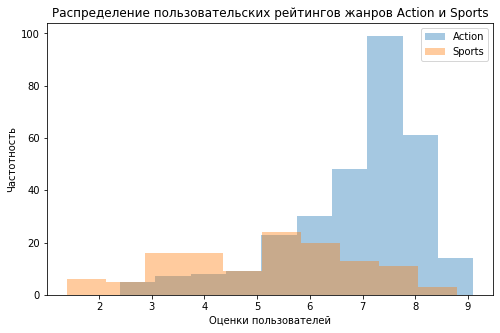

In [41]:
#построим общую гистограмму, установим прозрачность = 0,4
action_score.plot(kind='hist', label='Action', alpha=0.4)
sports_score.plot(kind='hist', label='Sports', alpha=0.4, figsize=(8, 5))
plt.title('Распределение пользовательских рейтингов жанров Action и Sports')
plt.legend()
plt.ylabel('Частотность')
plt.xlabel('Оценки пользователей')
plt.show()

Пользователи играм жанра Action чаще ставят оценку 7,5. График по этому жанру ассиметричный, скошенный влево. На графике по жанру Sports нет ярко выраженных пиков, оценки распределены практически равномерно. Тем не менее, самая распространенная оценка в диапазоне от 5,1 до 5,8. Гистограмма тоже ассиметричная, со скошенным влево набором данных. 

Проведем тест Левена и выясним, равны ли дисперсии выборок по жанрам:

In [42]:
#уровень статистической значимости = 5 %
alpha = 0.05
#проведем тест Левена и вычислим значение р
stat, p = levene(action_score, sports_score)
print('p-value:', p)

#если значение р меньше 5 %, то дисперсии не равны
if p < alpha:
    print('Дисперсии не равны')
else:
    print('Дисперсии равны')

p-value: 3.7944810319036717e-06
Дисперсии не равны


Значение *p* приближено нулю, то есть меньше уровня статистической значимости в 5 %. Дисперсии двух выборок не равны. 

Проведем t-тест, чтобы проверить гипотезы и выяснить, равны ли средние значения пользовательских рейтингов жанров Action и Sports. Критический уровень статистической значимости снова определим в 0,05. Зададим параметр *equal_var = False*, так как тест Левена показал, что дисперсии выборок не равны. 

In [43]:
alpha = 0.05
#в переменной сохраним результаты t-теста, первый массив с данными по платформе XOne, второй - PC
genre_result = st.ttest_ind(action_score, sports_score, equal_var=False)
#выведем значение p
print('p-value:', genre_result.pvalue)

#если значение р меньше 5 %, то отвергаем нулевую гипотезу
if genre_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние значения не равны')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 3.5076737062533683e-19
Отвергаем нулевую гипотезу, средние значения не равны


**Вывод**

*р*-значение практически равно нулю и меньше уровня статистической значимости. Это позволяет нам отвергнуть нулевую гипотезу: в генеральной совокупности средние значения пользовательских рейтингов жанров Action и Sports различаются.

## Общий вывод

Перед нами стояла задача выявить закономерности, определяющие успешность компьютерной игры. Они необходимы для того, чтобы спланировать рекламную кампанию интернет-магазина на 2017 год. В нашем распоряжении были данные до 2016 года о продажах игр, платформах и жанрах, оценках пользователей и критиков. 

В ходе исследования мы установили, что средняя «продолжительность жизни» платформы составляет примерно 10 лет. Пика они достигают в первые пять лет, во второй половине наблюдается постепенный спад. Мы пришли к выводу, что для прогнозирования потенциально успешных платформ нам нужно брать в расчет только те, которые были выпущены не ранее 2013 года. Так мы определили три потенциально популярные платформы — PS4, Xbox One и 3DS. 

Мы установили, что на продажи игр не влияет пользовательский рейтинг. Но между оценками критиков и объемом продаж существует небольшая прямая зависимость. Также мы провели статистические тесты и определили, что средние значения пользовательских рейтингов платформ XOne и PC в генеральной совокупности, скорее всего, близки по значению. А также установили, что средние оценки пользователей игр в жанрах Action и Sports различаются.

На успешность игры также влияет регион продажи. В Северной Америке и Европе популярностью пользуются одни и те же платформы, большую долю общих продаж имеет PS4. Лидирующими жанрами в этих регионах являются Action и Shooter. Наиболее популярны игры для взрослых, с рейтингом «М» — от 17 лет и старше. Япония же кардинально отличается от Америки и Европы. Здесь самая продаваемая платформа 3DS от японской компании Nintendo, самый популярный жанр — Role-Playing. Лучше других продаются игры без рейтинга от ESRB, потому как эта компания определяет рейтинг только тех игр, которые продаются на территории Северной Америки. В Японии существует своя организация, выставляющая играм рейтинги — CERO.